# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [118]:
# you are free to use any package you deem fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

In [119]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

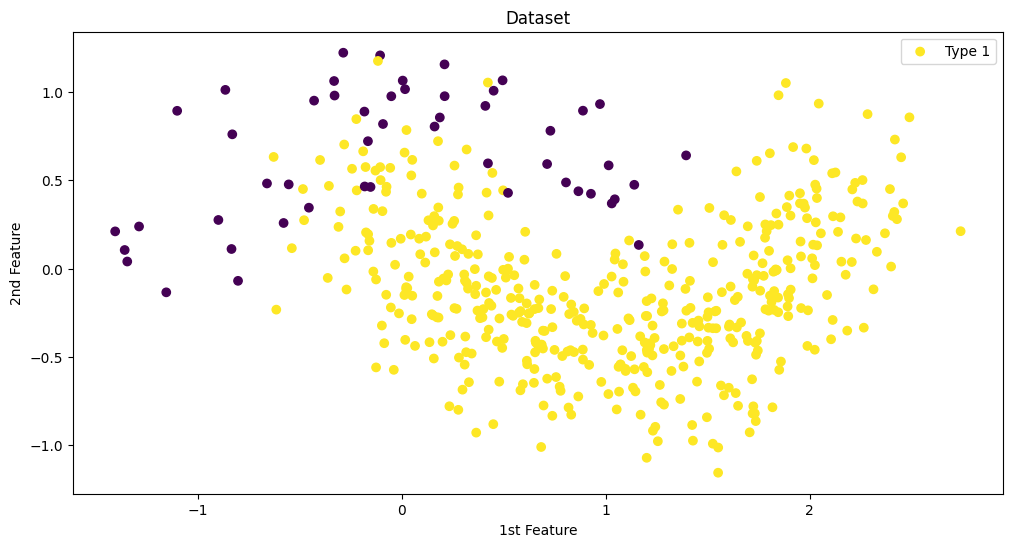

In [120]:
f = plt.figure(figsize=(12,6))
plt.scatter([x[0] for x in X], [x[1] for x in X], c=Y)

plt.legend(['Type 1','Type 2'])
plt.xlabel("1st Feature")
plt.ylabel('2nd Feature')
plt.title("Dataset")

plt.show()

## Training

In [121]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=42)

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=2, activation="relu"))
model.add(Dense(3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=200, batch_size=15)

Epoch 1/200
24/24 [==============================] - 1s 2ms/step - loss: 0.9154 - accuracy: 0.1086
Epoch 2/200
24/24 [==============================] - 0s 3ms/step - loss: 0.8222 - accuracy: 0.1714
Epoch 3/200
24/24 [==============================] - 0s 3ms/step - loss: 0.7663 - accuracy: 0.3086
Epoch 4/200
24/24 [==============================] - 0s 2ms/step - loss: 0.7282 - accuracy: 0.4800
Epoch 5/200
24/24 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.6114
Epoch 6/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.7086
Epoch 7/200
24/24 [==============================] - 0s 1ms/step - loss: 0.6630 - accuracy: 0.7543
Epoch 8/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6481 - accuracy: 0.8057
Epoch 9/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.8429
Epoch 10/200
24/24 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.8829
Epoch 11/

## Testing / Optimization

In [122]:
_, accuracy = model.evaluate(x_test, y_test)
print("Model accuracy: %.2f"% (accuracy*100))


5/5 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.9000
Model accuracy: 90.00


In [123]:
#remove layers
model = Sequential()

#try new activation functions

model.add(Dense(3, input_dim=2, activation="tanh"))
model.add(Dense(3, activation="tanh"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=200, batch_size=15, verbose = False)

_, accuracy = model.evaluate(x_test, y_test)
print("Model accuracy: %.2f"% (accuracy*100))

#turns out that tanh activation is better, even though this is usually used for classification layer. I think this is due to the fact that the features span from negative
#to positive numbers and relu essentially ignores all values below 0. I will test how the relu activation function will work compared to tanh if the data is normalized to 0 
#to 1.



5/5 [==============================] - 0s 2ms/step - loss: 0.1511 - accuracy: 0.9333
Model accuracy: 93.33


In [124]:
#more layers to add more complexity to the model
from keras.models import Sequential
from keras.layers import Dense

#remove all the layers
model = Sequential()

#create new layers
model.add(Dense(3, input_dim=2, activation="relu"))
model.add(Dense(3, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=200, batch_size=15, verbose = False)

_, accuracy = model.evaluate(x_test, y_test)
print("Model accuracy: %.2f"% (accuracy*100))

#turns out the simplier model is the same

5/5 [==============================] - 0s 2ms/step - loss: 0.1804 - accuracy: 0.9333
Model accuracy: 93.33


In [125]:
#0 - 1 normalization of data

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler() 
x_train_norm = min_max_scaler.fit_transform(x_train)
x_test_norm = min_max_scaler.fit_transform(x_test)

#remove layers

model = Sequential()

#try new activation functions

model.add(Dense(3, input_dim=2, activation="relu"))
model.add(Dense(3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train_norm, y_train, epochs=200, batch_size=15, verbose = False)

_, accuracy = model.evaluate(x_test_norm, y_test)
print("Model accuracy: %.2f"% (accuracy*100))

#just barely better. This is probably because there aren't many features and all the features are in the same relative range meaning that they are comparable to eachother

5/5 [==============================] - 0s 2ms/step - loss: 0.1817 - accuracy: 0.9400
Model accuracy: 94.00


In [126]:
#Final Model

#remove layers
model = Sequential()

#try new activation functions

model.add(Dense(3, input_dim=2, activation="relu"))
model.add(Dense(3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=200, batch_size=15, verbose = False)

_, accuracy = model.evaluate(x_test, y_test)
print("Model accuracy: %.2f"% (accuracy*100))



5/5 [==============================] - 0s 2ms/step - loss: 0.1828 - accuracy: 0.9333
Model accuracy: 93.33


## Performance Analysis

In [130]:
sqrt_mean_squared_err = np.mean((model.predict(x_test)-y_test)**2)**0.5
mean_abs_err = np.mean(np.abs(model.predict(x_test)-y_test))

print("root mean squared error was:", sqrt_mean_squared_err)
print("mean absolute error was:", mean_abs_err)

5/5 [==============================] - 0s 1ms/step
root mean squared error was: 0.34494488944208174
mean absolute error was: 0.19585309506456058


The model has a 93.33% accuracy on the testing dataset, so it performs well on data that it has not seen yet at all. The root mean squared error is pretty low as well at .344 for ~400 datapoints total. thats around ~.01 error per datapoint which is a ~1% error per datapoint. For the mean absolute error its lower at .195 total or ~.05 error per datapoint, probably because the classification is binary, meaning that if the model classifies the training data wrong it will be far off inherently as it is not a continous distrubution. This is good as it means the model has not overfitting on this data, which is usually the case for small datasets such as this one. 